# Social Media Virality Prediction using K-Means

# K-Means를 사용한 소셜 미디어 전파성 예측

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

소셜 미디어는 오늘날 모든 사람의 삶의 일부입니다. 인공 지능은 소셜 미디어의 추세를 분석하는 데 효과적으로 사용할 수 있습니다.

이 노트북에서는 K-Means 모델을 사용하여 소셜 미디어 게시물의 전파성을 예측하는 방법에 중점을 둘 것입니다.

## Context

[UCI](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)에 업로드되는 Mashable(인기 있는 소셜 기사 공유 플랫폼)에서 게시한 기사 데이터 세트로 작업할 예정입니다. K-Means 모델을 사용하여 클러스터 내의 기사가 비슷한 인기를 가질 수 있도록 기사 데이터 세트를 클러스터 그룹으로 나눕니다.


### Side note: K-Means란?

K-Means는 동일한 그룹(클러스터라고 함)에 있는 객체가 다른 그룹(클러스터)에 있는 객체보다 서로 더 유사하도록(어떤 의미에서) 데이터 세트를 그룹으로 나누는 간단한 알고리즘입니다.

![예시](https://miro.medium.com/max/700/1*vNng_oOsNRHKrlh3pjSAyA.png)


## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다. 

## Import Libraries


In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



### Dataset 가져오기

데이터 세트에는 Mashable 기사 세트가 포함되어 있습니다. 데이터 세트를 시각화해 보겠습니다.


In [2]:
# 데이터세트 가져오기
df = pd.read_csv('[Dataset]_Module11_(Viral).csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# URL 열은 문자열만 있고 클러스터링에 도움이 되지 않아 삭제 합니다.
X = df.drop('url',axis=1)

In [4]:
print(X.columns)

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

## TASK 1: 데이터 세트 X에서 timedelta 열을 삭제하고 결과를 X에 저장하기

In [5]:
X = X.drop(' timedelta', axis=1)

In [6]:
print(X.columns)

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

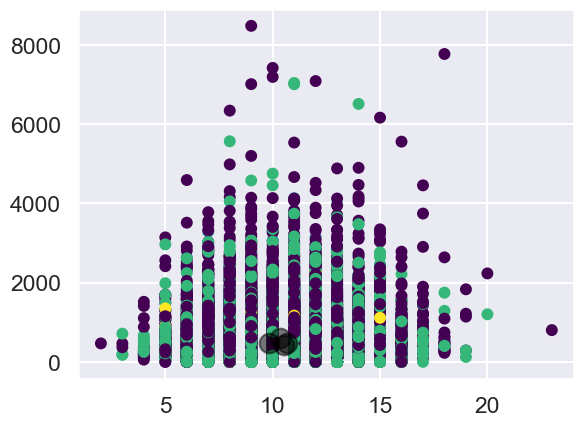

In [7]:
# K-Means 알고리즘은 KMeans 함수로 호출할 수 있습니다. 클러스터 수를 인수로 전달합니다.
kmeans = KMeans(n_clusters=4)
# kmeans.fit 함수로 kmeans 모델을 피팅합니다.
kmeans_output = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

위의 클러스터링은 클러스터가 서로 분리되어 있지 않아 구분이 어렵습니다.

이제 더 작은 데이터 세트를 이용하여 시도해 봅시다.

### 더 작은 데이터세트

더 작은 데이터 세트는 X의 처음 2개 열(n_tokens_title 및 n_tokens_content)을 사용하여 생성됩니다.

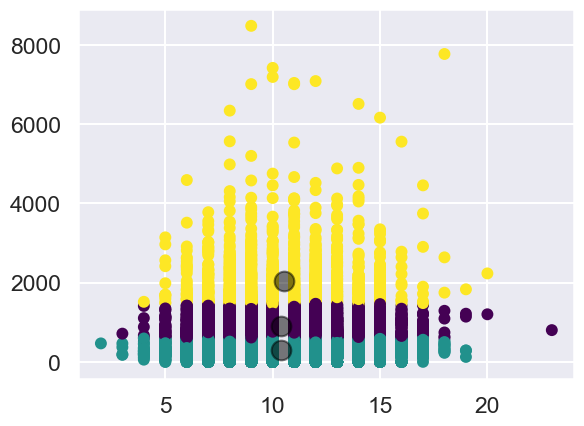

In [8]:
X1 = X.iloc[:, 0:2]
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

클러스터가 명확하게 분리되어 있음을 확인할 수 있습니다. 여기서는 K-means 알고리즘의 성능이 정말 좋아 보입니다. 동일한 클러스터의 기사는 유사한 전파 가능성이 있습니다.

## Task 2: X의 처음 10개 열을 선택하고 결과를 변수 X2에 저장하기

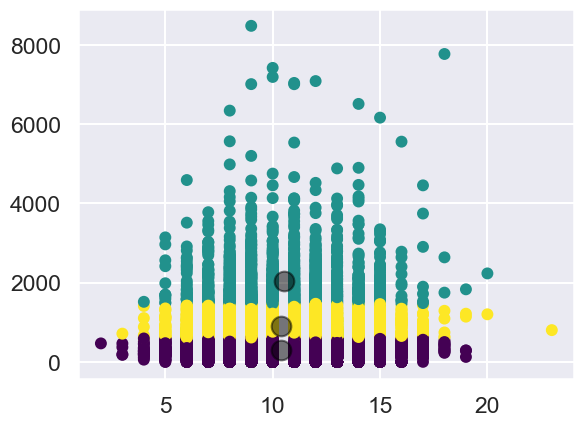

In [13]:
X2 = X.iloc[:, 0:10]
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

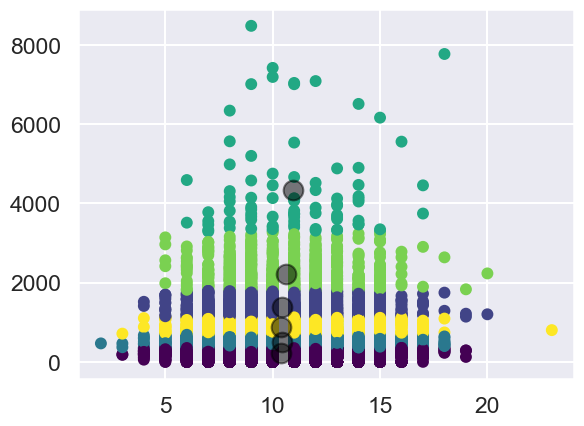

In [14]:
# 이제 클러스터가 6개인 X2에 K-Means 알고리즘을 적용해 보겠습니다.
kmeans = KMeans(n_clusters=6)
kmeans_output = kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [15]:
# X의 하위 집합 데이터 세트 X3를 사용하겠습니다.
X3 = X.iloc[:, 5:13]


## Task 3: 4개의 클러스터가 있는 데이터 세트 X3에 K-Means을 적용하고 데이터 시각화하기

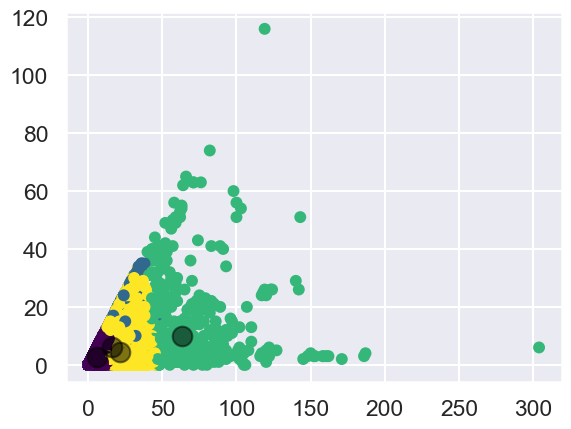

In [16]:
# 이제 클러스터가 4개인 X3에 K-Means 알고리즘을 적용해 보겠습니다.
kmeans = KMeans(n_clusters=4)
kmeans_output = kmeans.fit(X3)
y_kmeans = kmeans.predict(X3)
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Task 3: 4개의 클러스터가 있는 데이터 세트 X3에 K-Means을 적용하고 데이터 시각화하기

In [17]:
print(len(X.columns))
X4 = pd.concat([X.iloc[:, 5:13], X.iloc[:, 58]], axis=1)
X4.head()

59


,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,shares
0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,593
1,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,711
2,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1500
3,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,1200
4,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,505


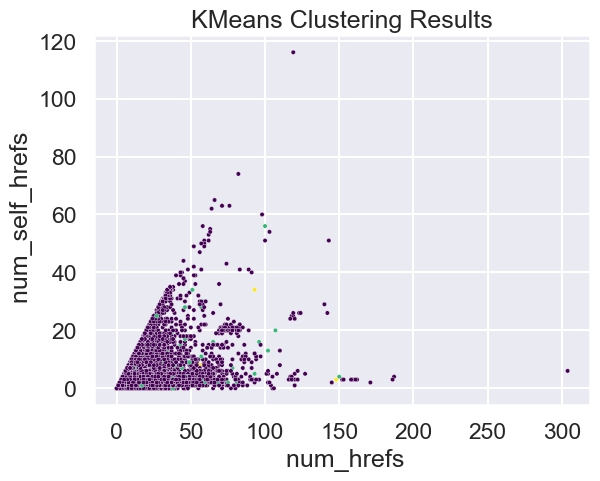

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans_output = kmeans.fit(X4)

y_kmeans = kmeans.predict(X4)

sns.scatterplot(x=X4.iloc[:, 0], y=X4.iloc[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.show()

9


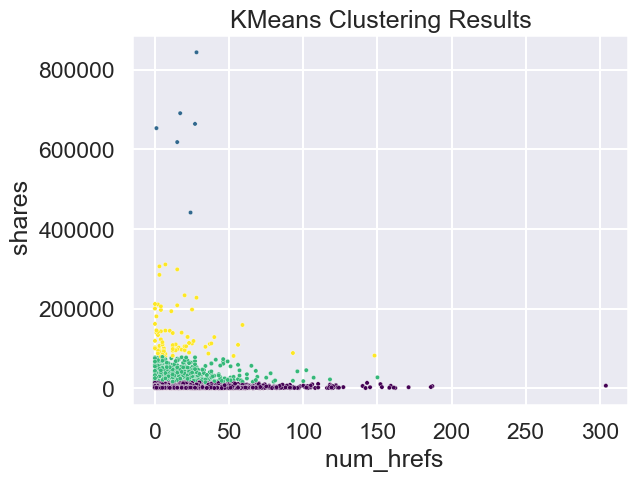

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans_output = kmeans.fit(X4)
y_kmeans = kmeans.predict(X4)
print(len(X4.columns))

sns.scatterplot(x=X4.iloc[:, 0], y=X4.iloc[:, 8], c=y_kmeans, s=10, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.show()

(6, 9)
                          Feature    Importance
8                          shares  38987.585770
3                      num_videos  38352.957794
5                    num_keywords  38105.729951
0                       num_hrefs  25323.980710
2                        num_imgs  22165.378596
1                  num_self_hrefs  19899.810419
7   data_channel_is_entertainment   5077.382388
4            average_token_length   4233.632129
6       data_channel_is_lifestyle    861.364503


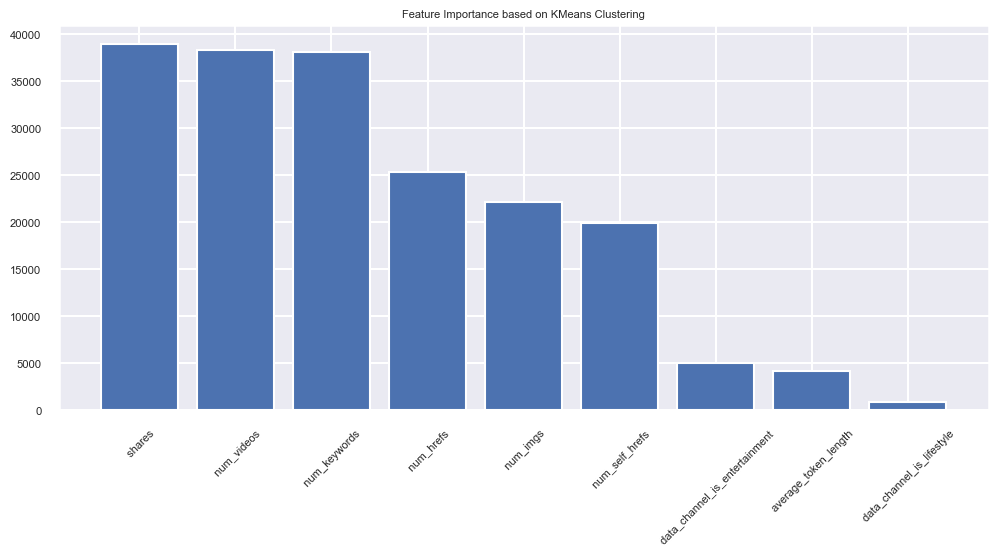

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X4)

# 클러스터링 수행
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# 각 클러스터 중심 계산
centers = kmeans.cluster_centers_ # 각 그룹에 대해서 각 축별로 구성된 중점이 존재해야 한다. shape : (k, 컬럼수) 
print(centers.shape)

# 각 변수의 중요도 평가 (분산 기반)
def calculate_feature_importance(X, centers, labels):
    n_clusters = centers.shape[0]
    n_features = X.shape[1]
    importances = np.zeros(n_features)
    
    for i in range(n_clusters):
        cluster_points = X[labels == i] # 그룹(i)별로 데이터를 걸러냄.
        if len(cluster_points) == 0:
            continue
        cluster_center = centers[i]
        importances += np.sum((cluster_points - cluster_center) ** 2, axis=0)  # axis=0은 해당 칼럼전체 합 

    return importances

importances = calculate_feature_importance(X_scaled, centers, clusters)
importance_df = pd.DataFrame({
    'Feature': X4.columns,
    'Importance': importances
})

# 중요도 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 출력
print(importance_df)

# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.title("Feature Importance based on KMeans Clustering")
plt.bar(range(len(importances)), importance_df['Importance'], align="center")
plt.xticks(range(len(importances)), importance_df['Feature'], rotation=45)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()
